In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
import keras
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.layers import Input,Conv2D,BatchNormalization,Activation,Dropout,MaxPooling2D,Flatten,Dense

In [2]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("Brain_tumor_images/",
                                                              validation_split=0.2,
                                                              subset='training',
                                                              seed = 42,
                                                              image_size=(224,224),
                                                              batch_size=16)
val_ds = tf.keras.preprocessing.image_dataset_from_directory("Brain_tumor_images/",
                                                            validation_split=0.2,
                                                            subset='validation',
                                                            seed = 42,
                                                            image_size=(224,224),
                                                            batch_size=16)
class_names = train_ds.class_names
print(class_names)

Found 804 files belonging to 2 classes.
Using 644 files for training.
Found 804 files belonging to 2 classes.
Using 160 files for validation.
['Normal', 'Tumor']


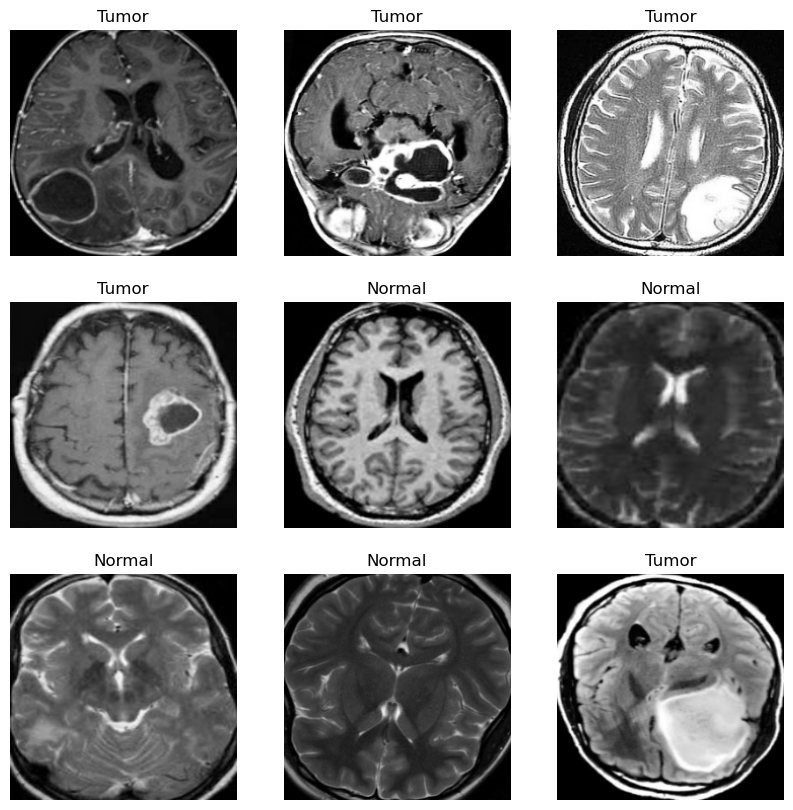

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
input_shape = (224, 224, 3)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)


x = base_model.output
x=  Dropout(0.50)(x)
x = Flatten()(x)
x=  Dropout(0.50)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

for layer in base_model.layers:
    layer.trainable = False

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
41/41 [==============================] - 14s 170ms/step - loss: 9.3981 - accuracy: 0.8028 - val_loss: 0.1422 - val_accuracy: 0.9625
Epoch 2/10
41/41 [==============================] - 5s 126ms/step - loss: 0.8280 - accuracy: 0.8975 - val_loss: 0.0704 - val_accuracy: 0.9812
Epoch 3/10
41/41 [==============================] - 5s 127ms/step - loss: 0.4088 - accuracy: 0.9410 - val_loss: 0.2130 - val_accuracy: 0.9688
Epoch 4/10
41/41 [==============================] - 5s 127ms/step - loss: 0.2091 - accuracy: 0.9674 - val_loss: 1.2361e-04 - val_accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 5s 128ms/step - loss: 0.5362 - accuracy: 0.9519 - val_loss: 0.0696 - val_accuracy: 0.9688
Epoch 6/10
41/41 [==============================] - 5s 127ms/step - loss: 0.3234 - accuracy: 0.9705 - val_loss: 3.7204e-08 - val_accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 5s 129ms/step - loss: 0.1387 - accuracy: 0.9814 - val_loss: 8.0449e-05 - val_accuracy: 

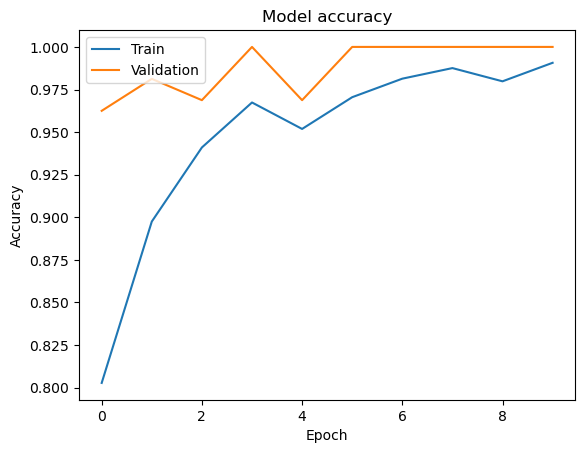

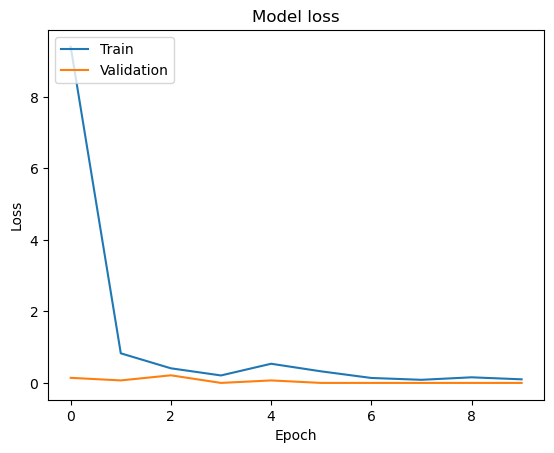

In [7]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [8]:
import cv2
def predict_image(img):
    img_resized = cv2.resize(img, (224, 224))
    test_img = img_resized.reshape(1,224,224,3)
    pred = model.predict(test_img)
    if pred>0.5:
        res = "TUMOUR"
    else:
        res = "NO TUMOUR"
    return res

In [ ]:
import gradio as gr
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

E:\Anaconda\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
E:\Anaconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
E:\Anaconda\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
E:\Anaconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 27ms/step
